In [1]:
# Base utilities
import os

# Data Mining
import math
import random
random_state = 42
random.seed(random_state)
seed=random_state
import numpy as np
import pandas as pd
import geopandas as gpd
# import osmnx as ox
# import pandana as pdn
import pickle as pkl
import folium

# Plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

# Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Directories
for d in ["data", "models", "logs", "results"]:
    if not os.path.isdir(d):
        os.mkdir(d)

## Trips

In [5]:
# Bring the trips
trips = pd.read_csv("../input_data/trips.csv")
# trips = pd.read_csv("/content/drive/MyDrive/Mobility_Choice/input_data/trips.csv")
trips = trips[trips['Mun_Ori'] != trips['Mun_Des']]
trips = trips[trips['Act_Des'].isin(['Trabajo habitual', 'Asuntos trabajo'])]
trips = trips.drop(columns=['Unnamed: 0', 'Prov_Ori', 'Prov_Des',
       'Act_Ori', 'Act_Des', 'Proposito', 'Dur_Tot',
        'Bill', 'Park', 'Peaje', 'Provincia','Comarca',
       'crnt_mot', 'crnt_otr', 'Año', 'Motos'])
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,elev,Municipio,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income
3,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Coche conductor,14:00,99,53,Resto Alava/Araba,2,3,2 adultos con niño(s),1,5,1,1,27765.01
4,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Coche conductor,15:30,99,139,Amurrio,2,3,2 adultos con niño(s),1,5,1,1,23649.17
18,Donostialdea,Goierri,Andoain,Beasain,RENFE,07:10,23,230,Andoain,1,1,2 adultos,1,5,1,1,23138.60
29,Donostialdea,Donostialdea,Andoain,Hernani,Coche conductor,13:55,22,157,Andoain,2,3,2 adultos con niño(s),1,5,1,1,27604.31
38,Donostialdea,Urola Kosta,Andoain,Zarautz,Coche conductor,05:30,22,258,Andoain,1,2,Hogar de una persona,1,5,1,1,26224.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21822,Urola Kosta,Donostialdea,Zarautz,Donostia/San Sebastian,Coche conductor,08:30,21,92,Zarautz,1,3,2 adultos,1,5,1,1,26199.41
21848,Tolosaldea,Donostialdea,Tolosa,Donostia/San Sebastian,Coche conductor,08:00,22,64,Tolosa,2,2,2 adultos con niño(s),2,5,1,1,26100.71
21860,Bidasoa,Bidasoa,Hondarribia,Irun,Coche conductor,08:30,23,148,Hondarribia,2,3,2 adultos con niño(s),1,5,1,1,25648.56
21863,Bidasoa,Bidasoa,Hondarribia,Irun,Coche conductor,08:15,22,209,Hondarribia,2,3,2 adultos con niño(s),2,5,1,1,26297.51


In [6]:
# Changes primary modes to a different model: auto or green_modes

trips = trips[trips['Modo'] != 'Otros']

# 5 MODOS

# trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Coche"
# trips.loc[trips.Modo=="Coche conductor","Modo"] = "Coche"
# trips.loc[trips.Modo=="Moto","Modo"] = "Coche"
# trips.loc[trips.Modo=="Taxi","Modo"] = "Coche"
# trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "Autobus"
# trips.loc[trips.Modo=="Autobús urbano","Modo"] = "Autobus"
# trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "Autobus"
# trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "Tren"
# trips.loc[trips.Modo=="RENFE","Modo"] = "Tren"

# 2 MODOS, coche y green

# trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Coche"
# trips.loc[trips.Modo=="Coche conductor","Modo"] = "Coche"
# trips.loc[trips.Modo=="Moto","Modo"] = "Coche"
# trips.loc[trips.Modo=="Taxi","Modo"] = "Coche"
# trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "Green"
# trips.loc[trips.Modo=="Autobús urbano","Modo"] = "Green"
# trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "Green"
# trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "Green"
# trips.loc[trips.Modo=="RENFE","Modo"] = "Green"
# trips.loc[trips.Modo=="Andando","Modo"] = "Green"
# trips.loc[trips.Modo=="Bicicleta","Modo"] = "Green"

# 2 MODOS, TP y coche

trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Coche"
trips.loc[trips.Modo=="Coche conductor","Modo"] = "Coche"
trips.loc[trips.Modo=="Moto","Modo"] = "Coche"
trips.loc[trips.Modo=="Taxi","Modo"] = "Coche"
trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "TP"
trips.loc[trips.Modo=="Autobús urbano","Modo"] = "TP"
trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "TP"
trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "TP"
trips.loc[trips.Modo=="RENFE","Modo"] = "TP"
trips = trips[trips['Modo'] != 'Andando']
trips = trips[trips['Modo'] != 'Bicicleta']

# 3 MODOS

# trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Coche"
# trips.loc[trips.Modo=="Coche conductor","Modo"] = "Coche"
# trips.loc[trips.Modo=="Moto","Modo"] = "Coche"
# trips.loc[trips.Modo=="Taxi","Modo"] = "Coche"
# trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "PT"
# trips.loc[trips.Modo=="Autobús urbano","Modo"] = "PT"
# trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "PT"
# trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "PT"
# trips.loc[trips.Modo=="RENFE","Modo"] = "PT"
# trips.loc[trips.Modo=="Andando","Modo"] = "Active modes"
# trips.loc[trips.Modo=="Bicicleta","Modo"] = "Active modes"

# 4 MODOS

# trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Coche"
# trips.loc[trips.Modo=="Coche conductor","Modo"] = "Coche"
# trips.loc[trips.Modo=="Moto","Modo"] = "Coche"
# trips.loc[trips.Modo=="Taxi","Modo"] = "Coche"
# trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "PT"
# trips.loc[trips.Modo=="Autobús urbano","Modo"] = "PT"
# trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "PT"
# trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "PT"
# trips.loc[trips.Modo=="RENFE","Modo"] = "PT"
# trips.loc[trips.Modo=="Andando","Modo"] = "Andando"
# trips.loc[trips.Modo=="Bicicleta","Modo"] = "Bicicleta"

# Show modes of transportation

for p in [f"{label}: {trips[trips.Modo==label].shape[0]:,}" for label in trips.Modo.unique()]:
    print(p)
print(f"Total: {trips.shape[0]:,}")

Coche: 1,090
TP: 212
Total: 1,302


# Split the data - TRAIN & TEST

In [ ]:
# # Determinar el tamaño del 80% y el 20%
# percent_80 = int(len(trips) * 0.8)
# percent_20 = len(trips) - percent_80

# # Obtener índices aleatorios para el 80%
# indices_80 = np.random.choice(trips.index, percent_80, replace=False)

# # Crear dos nuevos DataFrames: uno para el 80% y otro para el 20%
# trips_trai1n = trips.loc[indices_80]
# trips_test = trips.drop(indices_80)

# Divide the dataset into ten dfs. SEGUNDA FORMA

# import pandas as pd
# import random

# # Crear un DataFrame con múltiples columnas, incluida una columna aleatoria
# num_filas = 100
# data = {
#     'Columna_Aleatoria': [random.randint(38, 2000) for _ in range(num_filas)],
#     'Otra_Columna1': [random.random() for _ in range(num_filas)],
#     'Otra_Columna2': [random.choice(['A', 'B', 'C']) for _ in range(num_filas)]
# }
# df = pd.DataFrame(data)

# # Calcular la suma total de la columna aleatoria
# suma_total = df['Columna_Aleatoria'].sum()

# # Calcular la suma deseada para cada DataFrame individual
# suma_deseada_por_df = suma_total / 10

# # Inicializar un diccionario para almacenar los DataFrames
# dataframes = {}

# # Inicializar variables para realizar el seguimiento de la suma actual en el DataFrame actual
# suma_actual = 0
# indice_actual = 1

# # Bucle para dividir el DataFrame en 10 DataFrames diferentes y asignarles nombres
# for _, fila in df.iterrows():
#     if suma_actual + fila['Columna_Aleatoria'] <= suma_deseada_por_df:
#         suma_actual += fila['Columna_Aleatoria']
#         if f'df_{indice_actual}' not in dataframes:
#             dataframes[f'df_{indice_actual}'] = pd.DataFrame()
#         dataframes[f'df_{indice_actual}'] = dataframes[f'df_{indice_actual}'].append(fila)
#     else:
#         suma_actual = fila['Columna_Aleatoria']
#         indice_actual += 1
#         dataframes[f'df_{indice_actual}'] = pd.DataFrame().append(fila)

# # Asignar los DataFrames a variables con nombres como df_1, df_2, ...
# for nombre, df_individual in dataframes.items():
#     globals()[nombre] = df_individual

# # Mostrar los DataFrames y sus nombres
# for i in range(1, 11):
#     nombre = f'df_{i}'
#     print(f'{nombre}:')
#     print(globals()[nombre])
#     print()


In [7]:
# Add group number for cross-validation
trips['Group'] = range(1, len(trips) + 1)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,elev,Municipio,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group
3,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Coche,14:00,99,53,Resto Alava/Araba,2,3,2 adultos con niño(s),1,5,1,1,27765.01,1
4,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Coche,15:30,99,139,Amurrio,2,3,2 adultos con niño(s),1,5,1,1,23649.17,2
18,Donostialdea,Goierri,Andoain,Beasain,TP,07:10,23,230,Andoain,1,1,2 adultos,1,5,1,1,23138.60,3
29,Donostialdea,Donostialdea,Andoain,Hernani,Coche,13:55,22,157,Andoain,2,3,2 adultos con niño(s),1,5,1,1,27604.31,4
38,Donostialdea,Urola Kosta,Andoain,Zarautz,Coche,05:30,22,258,Andoain,1,2,Hogar de una persona,1,5,1,1,26224.31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21822,Urola Kosta,Donostialdea,Zarautz,Donostia/San Sebastian,Coche,08:30,21,92,Zarautz,1,3,2 adultos,1,5,1,1,26199.41,1298
21848,Tolosaldea,Donostialdea,Tolosa,Donostia/San Sebastian,Coche,08:00,22,64,Tolosa,2,2,2 adultos con niño(s),2,5,1,1,26100.71,1299
21860,Bidasoa,Bidasoa,Hondarribia,Irun,Coche,08:30,23,148,Hondarribia,2,3,2 adultos con niño(s),1,5,1,1,25648.56,1300
21863,Bidasoa,Bidasoa,Hondarribia,Irun,Coche,08:15,22,209,Hondarribia,2,3,2 adultos con niño(s),2,5,1,1,26297.51,1301


# Expand the Data

In [8]:
# Expand data

nuevas_filas = []
for index, row in trips.iterrows():
    valores_columnas = row[trips.columns]
    repeticiones = row['elev']
    nuevas_filas.extend([valores_columnas] * repeticiones)

trips = pd.DataFrame(nuevas_filas, columns=trips.columns)

trips = trips.drop(columns=["elev"])

trips = trips.sample(frac=1).reset_index(drop=True)

# Change modes of transportation

In [10]:
# Reduce car trip number to the sum of the rest of the modes

# Number of green trips
condicion = trips['Modo'] != 'Coche'
green_trips = condicion.sum()

condicion = trips['Modo'] == 'Coche'
coche_trips = condicion.sum()
eliminar=coche_trips-green_trips

#eliminar=len(trips['MODO_INFORME']=='Coche')-green_trips

# Randomly choose that number of trips from the car trips

# Filter rows that follow mode="car"
coche_rows = trips[trips['Modo'] == 'Coche']

# Randomly choose X rows from the coche_rows df 
muestras_aleatorias = coche_rows.sample(n=eliminar)

# Delete previously non-selected rows
trips = trips[~trips.index.isin(muestras_aleatorias.index)]

trips=trips.reset_index(drop=True)

# Show modes of transportation

for p in [f"{label}: {trips[trips.Modo==label].shape[0]:,}" for label in trips.Modo.unique()]:
    print(p)
print(f"Total: {trips.shape[0]:,}")

Coche: 46,917
TP: 46,917
Total: 93,834


# Manually encode columns Hora_Ini and Municipio

In [ ]:
# Assign number to town, not to have problems when encoding. There might be towns in test that are not in train... that's why.

pueblos = pd.read_excel("../input_data/data_towns.xlsx")
eliminar = ['Region', 'Latitud', 'Longitud', 'Comarca',
       'Altitud (m.s.n.m.)', 'Superficie (kmÂ²)', 'PoblaciÃ³n (2019)',
       'Densidad (hab./kmÂ²)', 'Incluido']
pueblos = pueblos.drop(columns=eliminar)

trips = pd.merge(trips, pueblos, left_on='Municipio', right_on='Town')
trips = trips.drop(columns=['Municipio', 'Town'])
trips.rename(columns={'Código': 'Municipio'}, inplace=True)

In [ ]:
# Codify hour manually

trips['Hora_Ini'] = pd.to_datetime(trips['Hora_Ini'], format='%H:%M')

# Calculates difference in minutes from "00:00" and divides by 5
trips['Hora_Ini'] = ((trips['Hora_Ini'] - pd.to_datetime('00:00', format='%H:%M')).dt.total_seconds() / 300).astype(int) + 1
trips

# Add noise

In [ ]:
# Calculate max and min values, 1h with 92k rows
max_horaini = trips['Hora_Ini'].max()
min_horaini = trips['Hora_Ini'].min()
max_perhog = trips['Per_hog'].max()
min_perhog = trips['Per_hog'].min()
max_turismos = trips['Turismos'].max()
min_turismos = trips['Turismos'].min()
max_edad = trips['Edad'].max()
min_edad = trips['Edad'].min()

probabilidad_mantener_horaini = 0.5
probabilidad_mantener_perhog = 0.5
probabilidad_mantener_turismos = 0.85
probabilidad_mantener_edad = 0.5
probabilidad_mantener_income = 0

def agregar_ruido(row):

    # HORA_INI
    def valor_aleatorio_cercano_a_cero_horaini():
        mu = 0  # Average
        sigma = 8  # Standard deviation
        random_value = int(random.gauss(mu, sigma))
        return random_value

    if random.random() > probabilidad_mantener_horaini:
        row['Hora_Ini'] = row['Hora_Ini'] + valor_aleatorio_cercano_a_cero_horaini()

    if row['Hora_Ini'] > max_horaini:
        row['Hora_Ini'] == max_horaini
    if row['Hora_Ini'] < min_horaini:
        row['Hora_Ini'] == min_horaini

    # PER_HOG
    cambio_perhog = random.choices([-1, 0, 1], [0.3, probabilidad_mantener_perhog, 0.3])
    row['Per_hog'] = max(min_perhog, min(max_perhog, row['Per_hog'] + cambio_perhog[0]))

    # TURISMOS
    cambio_turismos = random.choices([-1, 0, 1], [0.3, probabilidad_mantener_turismos, 0.3])
    row['Turismos'] = max(min_turismos, min(max_turismos, row['Turismos'] + cambio_turismos[0]))

    # EDAD
    cambio_edad = random.choices([-1, 0, 1], [0.3, probabilidad_mantener_edad, 0.3])
    row['Edad'] = max(min_edad, min(max_edad, row['Edad'] + cambio_edad[0]))

    # INCOME
    # Function to generate random values with normal distribution
    def valor_aleatorio_cercano_a_cero_income():
        mu = 0  # Average
        sigma = 200.0  # Standard deviation
        random_value = int(random.gauss(mu, sigma))
        return random_value

    if random.random() > probabilidad_mantener_income:
        row['Income'] = row['Income'] + valor_aleatorio_cercano_a_cero_income()
    return row

trips = trips.apply(agregar_ruido, axis=1)

# Fix one last thing
trips['Hora_Ini'] = trips['Hora_Ini'].apply(lambda x: 1 if x < 1 else (288 if x > 288 else x))

trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group,Municipio
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,1,1,25987.260,58,30
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,1,1,23128.810,57,30
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,1,1,23624.610,1049,30
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,1,1,26037.260,58,30
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,1,1,24470.035,51,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,1,1,28523.960,158,49
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,1,1,28748.960,158,49
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,1,1,20910.700,156,49
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,1,1,28878.960,158,49


In [ ]:
# Save
trips.to_csv(f"results/trips_post_noise.csv")

In [ ]:
# Read
trips = pd.read_csv(f"results/trips_post_noise.csv",index_col=0)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group,Municipio
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,1,1,25987.260,58,30
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,1,1,23128.810,57,30
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,1,1,23624.610,1049,30
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,1,1,26037.260,58,30
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,1,1,24470.035,51,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,1,1,28523.960,158,49
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,1,1,28748.960,158,49
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,1,1,20910.700,156,49
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,1,1,28878.960,158,49


# Add percentile to trip taker

In [ ]:
# trips['Percentil'] = trips.groupby('Mun_Ori')['Income'].transform(
#     lambda x: pd.qcut(x, q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
# )
trips['Income_Percentile'] = trips.groupby('Mun_Ori')['Income'].transform(
    lambda x: pd.qcut(x, q=4, labels=False, duplicates='drop') + 1  # labels=False to get numeric labels (1-4)
)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group,Municipio,Income_Percentile
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,1,1,25987.260,58,30,4
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,1,1,23128.810,57,30,2
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,1,1,23624.610,1049,30,3
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,1,1,26037.260,58,30,4
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,1,1,24470.035,51,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,1,1,28523.960,158,49,3
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,1,1,28748.960,158,49,4
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,1,1,20910.700,156,49,1
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,1,1,28878.960,158,49,4


# Assign Lat and Long  to origin and destination

Bring the buildings

In [ ]:
gdf = gpd.read_file("../input_data/buildings_with_section/buildings_w_section.shp")
crs_objetivo = 'EPSG:4326'  # WGS84
gdf = gdf.to_crs(crs_objetivo)

gdf['Centroide'] = gdf['geometry'].centroid
gdf.columns

C:\Users\iazka\AppData\Local\Temp\ipykernel_56044\819810698.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['Centroide'] = gdf['geometry'].centroid


Index(['Town', 'Referencia', 'Descripcio', 'Edificabil', 'Solar', 'Vivienda',
       'Trastero', 'Garaje Cer', 'Agropecuar', 'Local Come', 'Industrial',
       'Almacen', 'Deportivo', 'Cultural', 'Educativo', 'Oficina',
       'Hosteleria', 'Obras Urba', 'Altura men', 'Terraza', 'Accesos y',
       'Jardin', 'Sanidad', 'Deposito', 'Duplex', 'Plaza Park', 'Religioso',
       'Espectacul', 'index_righ', 'Seccion', 'NMUN', 'Renta_medi',
       'Percentil', 'geometry', 'Centroide'],
      dtype='object')

In [ ]:
gdf_viviendas = gdf[(gdf['Vivienda'] != 0) | (gdf['Duplex'] != 0)]
gdf_oficinas = gdf[(gdf['Oficina'] != 0)]

In [ ]:
gdf_oficinas.columns

Index(['Town', 'Referencia', 'Descripcio', 'Edificabil', 'Solar', 'Vivienda',
       'Trastero', 'Garaje Cer', 'Agropecuar', 'Local Come', 'Industrial',
       'Almacen', 'Deportivo', 'Cultural', 'Educativo', 'Oficina',
       'Hosteleria', 'Obras Urba', 'Altura men', 'Terraza', 'Accesos y',
       'Jardin', 'Sanidad', 'Deposito', 'Duplex', 'Plaza Park', 'Religioso',
       'Espectacul', 'index_righ', 'Seccion', 'NMUN', 'Renta_medi',
       'Percentil', 'geometry', 'Centroide'],
      dtype='object')

In [ ]:
# Assign ORIGIN, 140 min

# Calculate assigment probability
def calcular_probabilidad(similitud):
    return 1 / ((similitud + 1) ** 2)  # Smaller the similtud, higher the probability

# Assign a building to each person based on probability
asignaciones = []
for _, persona in trips.iterrows():
    salario_persona = pd.to_numeric(persona['Income_Percentile'], errors='coerce')
    gdf_viviendas_1 = gdf_viviendas[gdf_viviendas['Town'] == persona['Mun_Ori']].reset_index(drop=True)
    probabilidades = []
    for _, edificio in gdf_viviendas_1.iterrows():
        clasificacion_edificio = pd.to_numeric(edificio['Percentil'], errors='coerce')
        similitud = abs(salario_persona - clasificacion_edificio)
        probabilidad = calcular_probabilidad(similitud)
        probabilidades.append(probabilidad)
    edificio_asignado = random.choices(gdf_viviendas_1['Centroide'], weights=probabilidades)[0]
    asignaciones.append(edificio_asignado)

trips['Edif_Ori'] = asignaciones

In [ ]:
# Save
trips.to_csv(f"results/trips_post_origin.csv")

In [ ]:
# Read
trips = pd.read_csv(f"results/trips_post_origin.csv",index_col=0)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group,Municipio,Income_Percentile,Edif_Ori
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,1,1,25987.260,58,30,4,POINT (-2.474246165586699 43.183202079736)
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,1,1,23128.810,57,30,2,POINT (-2.4726115934217696 43.18881147540062)
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,1,1,23624.610,1049,30,3,POINT (-2.471428915387793 43.18420844845034)
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,1,1,26037.260,58,30,4,POINT (-2.4514978764263247 43.18829914371085)
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,1,1,24470.035,51,30,3,POINT (-2.4605983005836167 43.19385407255551)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,1,1,28523.960,158,49,3,POINT (-2.1879092315721937 43.03058931938036)
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,1,1,28748.960,158,49,4,POINT (-2.1858395354656017 43.034758286577606)
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,1,1,20910.700,156,49,1,POINT (-2.1861760332727163 43.033569892799434)
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,1,1,28878.960,158,49,4,POINT (-2.159752997171762 43.03304166858555)


In [ ]:
# Assign DESTINO 3 mins

contador = 0
def asignar_coord_destino(row):

    # A variable to see the evolution of the code
    global contador  # Reference to global variable
    contador += 1    
    # Optional: print counter value to follow the process
    if contador % 100 == 0:  # Print per 100 rows
        print(f"Procesando fila {contador}")

    matching_rows = gdf_oficinas[gdf_oficinas['Town'] == row['Mun_Des']] # List with RC of the town

    auxiliar = matching_rows.drop(columns=['Town', 'Referencia', 'Descripcio', 'index_righ', 'Seccion', 'NMUN', 'Renta_medi', 'Percentil', 'geometry', 'Centroide'])

    if not matching_rows.empty:
        probabilidades = auxiliar.values / auxiliar.values.sum()

        fila_seleccionada = random.choices(range(auxiliar.shape[0]), weights=probabilidades.sum(axis=1))[0]
        columna_seleccionada = random.choices(range(auxiliar.shape[1]), weights=probabilidades[fila_seleccionada])[0]
        valor_seleccionado = auxiliar.iloc[fila_seleccionada, columna_seleccionada]
        fila = matching_rows.index[fila_seleccionada]
        return gdf_oficinas.loc[fila, 'Centroide']
    else:
        return None

trips['Edif_Des'] = trips.apply(asignar_coord_destino, axis=1)

Procesando fila 100
Procesando fila 200
Procesando fila 300
Procesando fila 400
Procesando fila 500
Procesando fila 600
Procesando fila 700
Procesando fila 800
Procesando fila 900
Procesando fila 1000
Procesando fila 1100
Procesando fila 1200
Procesando fila 1300
Procesando fila 1400
Procesando fila 1500
Procesando fila 1600
Procesando fila 1700
Procesando fila 1800
Procesando fila 1900
Procesando fila 2000
Procesando fila 2100
Procesando fila 2200
Procesando fila 2300
Procesando fila 2400
Procesando fila 2500
Procesando fila 2600
Procesando fila 2700
Procesando fila 2800
Procesando fila 2900
Procesando fila 3000
Procesando fila 3100
Procesando fila 3200
Procesando fila 3300
Procesando fila 3400
Procesando fila 3500
Procesando fila 3600
Procesando fila 3700
Procesando fila 3800
Procesando fila 3900
Procesando fila 4000
Procesando fila 4100
Procesando fila 4200
Procesando fila 4300
Procesando fila 4400
Procesando fila 4500
Procesando fila 4600
Procesando fila 4700
Procesando fila 4800
P

In [ ]:
trips = trips.drop(columns=['O_long', 'O_lat'])
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Income,Group,Municipio,Income_Percentile,Edif_Ori,Edif_Des
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,1,1,25987.260,58,30,4,POINT (-2.474246165586699 43.183202079736),POINT (-2.2020434156281876 43.046807590000455)
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,1,1,23128.810,57,30,2,POINT (-2.4726115934217696 43.18881147540062),POINT (-2.25895651878754 43.222514732022816)
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,1,1,23624.610,1049,30,3,POINT (-2.471428915387793 43.18420844845034),POINT (-2.396360834828406 43.23015953074038)
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,1,1,26037.260,58,30,4,POINT (-2.4514978764263247 43.18829914371085),POINT (-2.2011965199105936 43.044534250763306)
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,1,1,24470.035,51,30,3,POINT (-2.4605983005836167 43.19385407255551),POINT (-2.020648632303881 43.27763233420137)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,1,1,28523.960,158,49,3,POINT (-2.1879092315721937 43.03058931938036),POINT (-2.1935533353819174 43.04536601301581)
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,1,1,28748.960,158,49,4,POINT (-2.1858395354656017 43.034758286577606),POINT (-2.2095584305901395 43.04371482063348)
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,1,1,20910.700,156,49,1,POINT (-2.1861760332727163 43.033569892799434),POINT (-2.2334401654975578 43.05245647064154)
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,1,1,28878.960,158,49,4,POINT (-2.159752997171762 43.03304166858555),POINT (-2.236591466065183 43.04537960413317)


In [ ]:
# WKT to Lat and Long

from shapely import wkt
from shapely.geometry import Point

# def extraer_longitud(punto):
#     return punto.x

# def extraer_latitud(punto):
#     return punto.y

def extraer_longitud(punto_wkt):
    punto = wkt.loads(punto_wkt)
    return punto.x

def extraer_latitud(punto_wkt):
    punto = wkt.loads(punto_wkt)
    return punto.y

# TRAIN

trips['O_long'] = trips['Edif_Ori'].apply(extraer_longitud)
trips['O_lat'] = trips['Edif_Ori'].apply(extraer_latitud)
trips['D_long'] = trips['Edif_Des'].apply(extraer_longitud)
trips['D_lat'] = trips['Edif_Des'].apply(extraer_latitud)

trips = trips.drop(columns=["Edif_Ori","Edif_Des"])
trips = trips.reset_index(drop=True)

In [ ]:
# Save
trips.to_csv(f"results/trips_post_OD.csv")

In [ ]:
# Read
trips = pd.read_csv(f"results/trips_post_OD.csv",index_col=0)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,...,Actividad,crnt_tur,Income,Group,Municipio,Income_Percentile,O_long,O_lat,D_long,D_lat
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,...,1,1,25987.260,58,30,4,-2.474246,43.183202,-2.202043,43.046808
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,...,1,1,23128.810,57,30,2,-2.472612,43.188811,-2.258957,43.222515
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),...,1,1,23624.610,1049,30,3,-2.471429,43.184208,-2.396361,43.230160
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,...,1,1,26037.260,58,30,4,-2.451498,43.188299,-2.201197,43.044534
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,...,1,1,24470.035,51,30,3,-2.460598,43.193854,-2.020649,43.277632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,...,1,1,28523.960,158,49,3,-2.187909,43.030589,-2.193553,43.045366
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,...,1,1,28748.960,158,49,4,-2.185840,43.034758,-2.209558,43.043715
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,...,1,1,20910.700,156,49,1,-2.186176,43.033570,-2.233440,43.052456
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,...,1,1,28878.960,158,49,4,-2.159753,43.033042,-2.236591,43.045380


# Add Travel Time

In [ ]:
# 5 mins

networks = dict.fromkeys({
 "walk",
 "drive",
})

for k in networks:
    print(k)
    networks[k] = pdn.network.Network.from_hdf5(f'../input_data/networks/{k}_net.h5')

# TRANSIT

transit = dict.fromkeys({
 "transit_0001",
 "transit_0102",
 "transit_0203", # walk_network because transit is not available
 "transit_0304", # walk_network because transit is not available
 "transit_0405", # walk_network because transit is not available
 "transit_0506",
 "transit_0607",
 "transit_0708",
 "transit_0809",
 "transit_0910",
 "transit_1011",
 "transit_1112",
 "transit_1213",
 "transit_1314",
 "transit_1415",
 "transit_1516",
 "transit_1617",
 "transit_1718",
 "transit_1819",
 "transit_1920",
 "transit_2021",
 "transit_2122",
 "transit_2223",
 "transit_2324",
})

for k in transit:
    print(k)
    transit[k] = pdn.network.Network.from_hdf5(f'../input_data/transit_24h/{k}.h5')

# TRAIN

train = dict.fromkeys({
 "train_0001", # walk_network because train is not available
 "train_0102", # walk_network because train is not available
 "train_0203", # walk_network because train is not available
 "train_0304", # walk_network because train is not available
 "train_0405", # walk_network because train is not available
 "train_0506",
 "train_0607",
 "train_0708",
 "train_0809",
 "train_0910",
 "train_1011",
 "train_1112",
 "train_1213",
 "train_1314",
 "train_1415",
 "train_1516",
 "train_1617",
 "train_1718",
 "train_1819",
 "train_1920",
 "train_2021",
 "train_2122",
 "train_2223",
 "train_2324",
})

for k in train:
    print(k)
    train[k] = pdn.network.Network.from_hdf5(f'../input_data/train_24h/{k}.h5')

walk
drive
transit_2223
transit_1516
transit_2122
transit_2324
transit_0001
transit_0304
transit_1819
transit_0506
transit_0102
transit_1213
transit_1617
transit_1112
transit_1718
transit_2021
transit_0708
transit_0203
transit_1011
transit_0405
transit_1920
transit_0809
transit_0910
transit_1415
transit_1314
transit_0607
train_0506
train_0001
train_0809
train_0304
train_0607
train_1314
train_0405
train_1718
train_1920
train_1617
train_0910
train_1011
train_1415
train_2021
train_0708
train_1112
train_1516
train_0102
train_2324
train_2122
train_1213
train_0203
train_2223
train_1819


In [ ]:
# Assign tt

trips["drive_tt"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips.O_long,trips.O_lat),
            networks['drive'].get_node_ids(trips.D_long,trips.D_lat),
            imp_name='drive_time_s'
            )
trips["drive_tt"] = trips["drive_tt"] / 60 # To min

trips["distance"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips.O_long,trips.O_lat),
            networks['drive'].get_node_ids(trips.D_long,trips.D_lat),
            imp_name='distance'
            )

# trips["walk_tt"] = trips["walk_tt"] / 80.46 # Pasar de distancia (m) a minutos con un ritmo de 3 mp/h = 80.46 m/min.
# trips["bike_tt"] =  networks['drive'].shortest_path_lengths(
#             networks['drive'].get_node_ids(trips.O_long,trips.O_lat),
#             networks['drive'].get_node_ids(trips.D_long,trips.D_lat),
#             imp_name='distance'
#             )
# trips["bike_tt"] = trips["bike_tt"] * 60 / (1000*13.07)  # 13.07 km/h = 13.07*1000/60 m/min

# Add TRANSIT

for k in transit:
    trips[f"{k}_tt"] = transit[k].shortest_path_lengths(
            transit[k].get_node_ids(trips.O_long,trips.O_lat),
            transit[k].get_node_ids(trips.D_long,trips.D_lat)
    )

def asignar_valor(row):
    if 1 <= row['Hora_Ini'] <= 12:
        return row['transit_0001_tt']
    elif 13 <= row['Hora_Ini'] <= 24:
        return row['transit_0102_tt']
    elif 25 <= row['Hora_Ini'] <= 36:
        return row['transit_0203_tt']
    elif 37 <= row['Hora_Ini'] <= 48:
        return row['transit_0304_tt']
    elif 49 <= row['Hora_Ini'] <= 60:
        return row['transit_0405_tt']
    elif 61 <= row['Hora_Ini'] <= 72:
        return row['transit_0506_tt']
    elif 73 <= row['Hora_Ini'] <= 84:
        return row['transit_0607_tt']
    elif 85 <= row['Hora_Ini'] <= 96:
        return row['transit_0708_tt']
    elif 97 <= row['Hora_Ini'] <= 108:
        return row['transit_0809_tt']
    elif 109 <= row['Hora_Ini'] <= 120:
        return row['transit_0910_tt']
    elif 121 <= row['Hora_Ini'] <= 132:
        return row['transit_1011_tt']
    elif 133 <= row['Hora_Ini'] <= 144:
        return row['transit_1112_tt']
    elif 145 <= row['Hora_Ini'] <= 156:
        return row['transit_1213_tt']
    elif 157 <= row['Hora_Ini'] <= 168:
        return row['transit_1314_tt']
    elif 169 <= row['Hora_Ini'] <= 180:
        return row['transit_1415_tt']
    elif 181 <= row['Hora_Ini'] <= 192:
        return row['transit_1516_tt']
    elif 193 <= row['Hora_Ini'] <= 204:
        return row['transit_1617_tt']
    elif 205 <= row['Hora_Ini'] <= 216:
        return row['transit_1718_tt']
    elif 217 <= row['Hora_Ini'] <= 228:
        return row['transit_1819_tt']
    elif 229 <= row['Hora_Ini'] <= 240:
        return row['transit_1920_tt']
    elif 241 <= row['Hora_Ini'] <= 252:
        return row['transit_2021_tt']
    elif 253 <= row['Hora_Ini'] <= 264:
        return row['transit_2122_tt']
    elif 265 <= row['Hora_Ini'] <= 276:
        return row['transit_2223_tt']
    elif 277 <= row['Hora_Ini'] <= 288:
        return row['transit_2324_tt']
    else:
        return None 

# Create new column
trips['transit_tt'] = trips.apply(asignar_valor, axis=1)

trips = trips.drop(columns=['transit_1314_tt',
       'transit_2122_tt', 'transit_1617_tt', 'transit_0405_tt',
       'transit_0001_tt', 'transit_1213_tt', 'transit_1415_tt',
       'transit_0910_tt', 'transit_0708_tt', 'transit_1011_tt',
       'transit_0102_tt', 'transit_1516_tt', 'transit_0506_tt',
       'transit_2021_tt', 'transit_2324_tt', 'transit_1819_tt',
       'transit_0203_tt', 'transit_0809_tt', 'transit_1718_tt',
       'transit_2223_tt', 'transit_0304_tt', 'transit_1920_tt',
       'transit_0607_tt', 'transit_1112_tt'])

# # Add TRAIN

for k in train:
    trips[f"{k}_tt"] = train[k].shortest_path_lengths(
            train[k].get_node_ids(trips.O_long,trips.O_lat),
            train[k].get_node_ids(trips.D_long,trips.D_lat)
    )

def asignar_valor(row):
    if 1 <= row['Hora_Ini'] <= 12:
        return row['train_0001_tt']
    elif 13 <= row['Hora_Ini'] <= 24:
        return row['train_0102_tt']
    elif 25 <= row['Hora_Ini'] <= 36:
        return row['train_0203_tt']
    elif 37 <= row['Hora_Ini'] <= 48:
        return row['train_0304_tt']
    elif 49 <= row['Hora_Ini'] <= 60:
        return row['train_0405_tt']
    elif 61 <= row['Hora_Ini'] <= 72:
        return row['train_0506_tt']
    elif 73 <= row['Hora_Ini'] <= 84:
        return row['train_0607_tt']
    elif 85 <= row['Hora_Ini'] <= 96:
        return row['train_0708_tt']
    elif 97 <= row['Hora_Ini'] <= 108:
        return row['train_0809_tt']
    elif 109 <= row['Hora_Ini'] <= 120:
        return row['train_0910_tt']
    elif 121 <= row['Hora_Ini'] <= 132:
        return row['train_1011_tt']
    elif 133 <= row['Hora_Ini'] <= 144:
        return row['train_1112_tt']
    elif 145 <= row['Hora_Ini'] <= 156:
        return row['train_1213_tt']
    elif 157 <= row['Hora_Ini'] <= 168:
        return row['train_1314_tt']
    elif 169 <= row['Hora_Ini'] <= 180:
        return row['train_1415_tt']
    elif 181 <= row['Hora_Ini'] <= 192:
        return row['train_1516_tt']
    elif 193 <= row['Hora_Ini'] <= 204:
        return row['train_1617_tt']
    elif 205 <= row['Hora_Ini'] <= 216:
        return row['train_1718_tt']
    elif 217 <= row['Hora_Ini'] <= 228:
        return row['train_1819_tt']
    elif 229 <= row['Hora_Ini'] <= 240:
        return row['train_1920_tt']
    elif 241 <= row['Hora_Ini'] <= 252:
        return row['train_2021_tt']
    elif 253 <= row['Hora_Ini'] <= 264:
        return row['train_2122_tt']
    elif 265 <= row['Hora_Ini'] <= 276:
        return row['train_2223_tt']
    elif 277 <= row['Hora_Ini'] <= 288:
        return row['train_2324_tt']
    else:
        return None

# Create new column
trips['train_tt'] = trips.apply(asignar_valor, axis=1)

trips = trips.drop(columns=['train_1314_tt',
       'train_2122_tt', 'train_1617_tt', 'train_0405_tt',
       'train_0001_tt', 'train_1213_tt', 'train_1415_tt',
       'train_0910_tt', 'train_0708_tt', 'train_1011_tt',
       'train_0102_tt', 'train_1516_tt', 'train_0506_tt',
       'train_2021_tt', 'train_2324_tt', 'train_1819_tt',
       'train_0203_tt', 'train_0809_tt', 'train_1718_tt',
       'train_2223_tt', 'train_0304_tt', 'train_1920_tt',
       'train_0607_tt', 'train_1112_tt'])
trips


c:\Users\iazka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandana\network.py:334: UserWarning: Unsigned integer: shortest path distance is trying to be calculated                 between the following external unconnected nodes: [(2293537554, 482767030), (60585484, 2222716104), (569381889, 2572058906), (298010663, 343677011), (25494966, 2222716104), (105987968, 5372151369), (25545304, 2222716104), (481515973, 2222716104), (540676140, 2572058906), (524458162, 2222716104), (619322174, 2222716104), (540679735, 2222716104), (2544005731, 2222716104), (493640929, 2222716104), (9689500844, 2222716104), (1714790130, 2222716104), (458445524, 2222716104), (1474073624, 2572058906), (298010663, 3003003806), (105987968, 567215413), (2293537554, 25495090), (306148365, 2222716104), (105987968, 258928367), (6986270, 25433542), (6986270, 311045977), (6986270, 4583133945), (105987968, 2217296397), (6986270, 4583133944), (6986270, 6929224), (298010695, 25438648), (105987968, 537847836), (2

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,...,Municipio,Income_Percentile,O_long,O_lat,D_long,D_lat,drive_tt,distance,transit_tt,train_tt
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,...,30,4,-2.474246,43.183202,-2.202043,43.046808,26.140733,35320.395,188.322,149.792
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,...,30,2,-2.472612,43.188811,-2.258957,43.222515,23.155850,26249.726,164.896,142.376
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),...,30,3,-2.471429,43.184208,-2.396361,43.230160,7.122200,8746.133,30.906,44.008
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,...,30,4,-2.451498,43.188299,-2.201197,43.044534,20.919467,32046.099,248.959,162.070
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,...,30,3,-2.460598,43.193854,-2.020649,43.277632,28.954933,47208.923,92.056,112.407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,...,49,3,-2.187909,43.030589,-2.193553,43.045366,3.498650,2145.452,13.115,23.174
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,...,49,4,-2.185840,43.034758,-2.209558,43.043715,5.749217,4816.817,25.463,43.604
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,...,49,1,-2.186176,43.033570,-2.233440,43.052456,8.886917,6123.641,42.624,68.317
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,...,49,4,-2.159753,43.033042,-2.236591,43.045380,9.979450,7916.306,65.121,84.207


# Add travel cost

In [ ]:
# Car variable cost

fuel_price_11=1.328 #€/litro
fuel_price_16=1.151 #€/litro
fuel_price_21=1.825 #€/litro
consumo_medio=7 #litros/100km
precio_21=(fuel_price_21*consumo_medio/100)/1000
precio_16=(fuel_price_16*consumo_medio/100)/1000
precio_11=(fuel_price_11*consumo_medio/100)/1000

# Car fixed cost
car_price = 20000 # €
years = 10
days_per_year = 250
car_fixed_cost = (car_price/years)/(days_per_year*2)

def custom_multiplier(row):
    if row['Año'] == 2021:
        return row['distance'] * precio_21
    elif row['Año'] == 2016:
        return row['distance'] * precio_16
    else:
        return row['distance'] * precio_11

# trips['drive_tc'] = trips.apply(custom_multiplier, axis=1)
trips['drive_tc'] = trips['distance']*precio_21 + car_fixed_cost
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,...,Income_Percentile,O_long,O_lat,D_long,D_lat,drive_tt,distance,transit_tt,train_tt,drive_tc
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,...,4,-2.474246,43.183202,-2.202043,43.046808,26.140733,35320.395,188.322,149.792,8.512180
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,...,2,-2.472612,43.188811,-2.258957,43.222515,23.155850,26249.726,164.896,142.376,7.353402
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),...,3,-2.471429,43.184208,-2.396361,43.230160,7.122200,8746.133,30.906,44.008,5.117318
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,...,4,-2.451498,43.188299,-2.201197,43.044534,20.919467,32046.099,248.959,162.070,8.093889
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,...,3,-2.460598,43.193854,-2.020649,43.277632,28.954933,47208.923,92.056,112.407,10.030940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,...,3,-2.187909,43.030589,-2.193553,43.045366,3.498650,2145.452,13.115,23.174,4.274081
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,...,4,-2.185840,43.034758,-2.209558,43.043715,5.749217,4816.817,25.463,43.604,4.615348
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,...,1,-2.186176,43.033570,-2.233440,43.052456,8.886917,6123.641,42.624,68.317,4.782295
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,...,4,-2.159753,43.033042,-2.236591,43.045380,9.979450,7916.306,65.121,84.207,5.011308


In [ ]:
# Public transport

# Fares

precios_lurraldebus = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Lurraldebus_precios', usecols=[0, 1])
precios_euskotren = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Euskotren_precios', usecols=[0, 1])
precios_renfe = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Renfe_precios', usecols=[0, 1])

precios_lurraldebus=precios_lurraldebus.dropna()
precios_euskotren=precios_euskotren.dropna()
precios_renfe=precios_renfe.dropna()

# Jumps between comarcas

saltos_lurraldebus = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='lurraldebus')
saltos_euskotren = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='euskotren')
saltos_renfe = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='renfe')

saltos_lurraldebus=saltos_lurraldebus.merge(precios_lurraldebus, on='Saltos', how='left')
saltos_euskotren=saltos_euskotren.merge(precios_euskotren, on='Saltos', how='left')
saltos_renfe=saltos_renfe.merge(precios_renfe, on='Saltos', how='left')

saltos_lurraldebus.rename(columns={'COMARCA ORI': 'Com_Ori'}, inplace=True)
saltos_lurraldebus.rename(columns={'COMARCA DES': 'Com_Des'}, inplace=True)

saltos_euskotren.rename(columns={'Poblacion ORIGEN': 'Mun_Ori'}, inplace=True)
saltos_euskotren.rename(columns={'Poblacion DESTINO': 'Mun_Des'}, inplace=True)

saltos_renfe.rename(columns={'Poblacion ORIGEN': 'Mun_Ori'}, inplace=True)
saltos_renfe.rename(columns={'Poblacion DESTINO': 'Mun_Des'}, inplace=True)

saltos_lurraldebus = saltos_lurraldebus.drop(columns='Unnamed: 0')
saltos_euskotren = saltos_euskotren.drop(columns='Unnamed: 0')
saltos_renfe = saltos_renfe.drop(columns='Unnamed: 0')

In [ ]:
# Save
trips.to_csv(f"results/trips_post_tt.csv")

In [ ]:
# Read
trips = pd.read_csv(f"results/trips_post_tt.csv",index_col=0)
trips

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,...,Income_Percentile,O_long,O_lat,D_long,D_lat,drive_tt,distance,transit_tt,train_tt,drive_tc
0,Debabarrena,Goierri,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,...,4,-2.474246,43.183202,-2.202043,43.046808,26.140733,35320.395,188.322,149.792,8.512180
1,Debabarrena,Urola Kosta,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,...,2,-2.472612,43.188811,-2.258957,43.222515,23.155850,26249.726,164.896,142.376,7.353402
2,Debabarrena,Debabarrena,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),...,3,-2.471429,43.184208,-2.396361,43.230160,7.122200,8746.133,30.906,44.008,5.117318
3,Debabarrena,Goierri,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,...,4,-2.451498,43.188299,-2.201197,43.044534,20.919467,32046.099,248.959,162.070,8.093889
4,Debabarrena,Donostialdea,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,...,3,-2.460598,43.193854,-2.020649,43.277632,28.954933,47208.923,92.056,112.407,10.030940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Goierri,Goierri,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,...,3,-2.187909,43.030589,-2.193553,43.045366,3.498650,2145.452,13.115,23.174,4.274081
91926,Goierri,Goierri,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,...,4,-2.185840,43.034758,-2.209558,43.043715,5.749217,4816.817,25.463,43.604,4.615348
91927,Goierri,Goierri,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,...,1,-2.186176,43.033570,-2.233440,43.052456,8.886917,6123.641,42.624,68.317,4.782295
91928,Goierri,Goierri,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,...,4,-2.159753,43.033042,-2.236591,43.045380,9.979450,7916.306,65.121,84.207,5.011308


In [ ]:
comarcas = pd.DataFrame({
    'Pueblo': ['Eibar', 'Tolosa', 'Elgoibar', 'Donostia/San Sebastian', 'Irun',
       'Oiartzun', 'Hondarribia', 'Hernani', 'Zarautz', 'Azkoitia',
       'Andoain', 'Lasarte-Oria', 'Errenteria', 'Pasaia', 'Lezo',
       'Beasain', 'Arrasate/Mondragon', 'Zumaia', 'Orio', 'Azpeitia',
       'Urretxu', 'Zumarraga', 'Usurbil', 'Oñati', 'Mutriku', 'Bergara',
       'Villabona', 'Urnieta', 'Deba', 'Legazpi', 'Aretxabaleta',
       'Ordizia', 'Lazkao'],
    'Comarca': ['Debabarrena', 'Tolosaldea', 'Debabarrena', 'Donostialdea', 'Bidasoa',
       'Donostialdea', 'Bidasoa', 'Donostialdea', 'Urola Kosta', 'Urola Erdia',
       'Donostialdea', 'Donostialdea', 'Donostialdea', 'Donostialdea', 'Donostialdea',
       'Goierri', 'Debagoiena', 'Urola Kosta', 'Urola Kosta', 'Urola Erdia',
       'Goierri', 'Goierri', 'Donostialdea', 'Debagoiena', 'Debabarrena', 'Debagoiena',
       'Tolosaldea', 'Donostialdea', 'Debabarrena', 'Goierri', 'Debagoiena',
       'Goierri', 'Goierri']
})

trips = trips.drop(columns=['Com_Ori', 'Com_Des'])

trips = pd.merge(trips, comarcas, left_on='Mun_Ori', right_on='Pueblo', how='left')
trips.rename(columns={'Comarca': 'Com_Ori'}, inplace=True)
trips = trips.drop(columns='Pueblo')

trips = pd.merge(trips, comarcas, left_on='Mun_Des', right_on='Pueblo', how='left')
trips.rename(columns={'Comarca': 'Com_Des'}, inplace=True)
trips = trips.drop(columns='Pueblo')
trips

,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,...,O_lat,D_long,D_lat,drive_tt,distance,transit_tt,train_tt,drive_tc,Com_Ori,Com_Des
0,Eibar,Beasain,Coche,85,21,1,2,Otros hogares sin niños,2,4,...,43.183202,-2.202043,43.046808,26.140733,35320.395,188.322,149.792,8.512180,Debabarrena,Goierri
1,Eibar,Azpeitia,Coche,88,22,2,2,Otros hogares con niños,2,3,...,43.188811,-2.258957,43.222515,23.155850,26249.726,164.896,142.376,7.353402,Debabarrena,Urola Erdia
2,Eibar,Elgoibar,Coche,91,22,1,2,1 adulto con niño(s),2,5,...,43.184208,-2.396361,43.230160,7.122200,8746.133,30.906,44.008,5.117318,Debabarrena,Debabarrena
3,Eibar,Beasain,Coche,79,21,2,1,Otros hogares sin niños,2,5,...,43.188299,-2.201197,43.044534,20.919467,32046.099,248.959,162.070,8.093889,Debabarrena,Goierri
4,Eibar,Usurbil,Coche,146,22,2,4,Otros hogares sin niños,2,4,...,43.193854,-2.020649,43.277632,28.954933,47208.923,92.056,112.407,10.030940,Debabarrena,Donostialdea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Lazkao,Beasain,Coche,89,22,1,4,2 adultos,1,5,...,43.030589,-2.193553,43.045366,3.498650,2145.452,13.115,23.174,4.274081,Goierri,Goierri
91926,Lazkao,Beasain,Coche,84,22,2,4,2 adultos,1,5,...,43.034758,-2.209558,43.043715,5.749217,4816.817,25.463,43.604,4.615348,Goierri,Goierri
91927,Lazkao,Beasain,Coche,81,22,1,1,2 adultos,2,6,...,43.033570,-2.233440,43.052456,8.886917,6123.641,42.624,68.317,4.782295,Goierri,Goierri
91928,Lazkao,Beasain,Coche,83,22,1,4,2 adultos,1,6,...,43.033042,-2.236591,43.045380,9.979450,7916.306,65.121,84.207,5.011308,Goierri,Goierri


In [ ]:
trips = trips.drop(columns=['Recur', 'Income', 'Municipio', 'Income_Percentile', 'O_long', 'O_lat', 'D_long', 'D_lat'])

# Assign travel fare

# For the bus, all have a fare even though they are not connected, because the fare is related to the comarca. The option will be punished by transit_weight if not connected directly.

trips = trips.merge(saltos_lurraldebus, on=["Com_Ori", "Com_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_L'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_L'}, inplace=True)

trips = trips.merge(saltos_euskotren, on=["Mun_Ori", "Mun_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_E'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_E'}, inplace=True)

trips = trips.merge(saltos_renfe, on=["Mun_Ori", "Mun_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_R'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_R'}, inplace=True)

trips=trips.drop(columns=['Saltos_L','Saltos_E','Saltos_R'])

# trips = trips.fillna(0)

# trips['Precio_euskotren'] = trips['Precio_euskotren'].astype(float)
# trips['Precio_renfe'] = trips['Precio_renfe'].astype(float)

trips.rename(columns={'Precio_L': 'transit_tc'}, inplace=True)
precio_max = saltos_lurraldebus['Precio'].max()
trips['transit_tc'].fillna(precio_max, inplace=True)

# Add train travel cost

trips['train_tc'] = np.where((trips['Precio_E'].isna()) & (trips['Precio_R'].isna()), trips['transit_tc'],  # Los pueblos no están conectados ni con Renfe ni Euskotren. Se cogerá el
                           np.where((~trips['Precio_E'].isna()) & (~trips['Precio_R'].isna()), (trips['Precio_E'] + trips['Precio_R']) / 2,  # Ninguna es cero
                                    np.maximum(trips['Precio_E'].fillna(0), trips['Precio_R'].fillna(0))))  # Una es cero y la otra no

trips = trips.drop(columns=['Precio_E','Precio_R'])

# I take the fare of the chosen option, this is, the shortest one

trips['pt_tc'] = trips.apply(lambda row: row['transit_tc'] if row['transit_tt'] < row['train_tt'] else row['train_tc'], axis=1)

# Shortest option between transit and train

trips['pt_tt'] = trips[['train_tt', 'transit_tt']].min(axis=1)
trips = trips.drop(columns=['train_tt', 'transit_tt', 'transit_tc', 'train_tc'])
trips

,Mun_Ori,Mun_Des,Modo,Hora_Ini,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Group,drive_tt,distance,drive_tc,Com_Ori,Com_Des,pt_tc,pt_tt
0,Eibar,Beasain,Coche,85,1,2,Otros hogares sin niños,2,4,1,1,58,26.140733,35320.395,8.512180,Debabarrena,Goierri,5.992727,149.792
1,Eibar,Azpeitia,Coche,88,2,2,Otros hogares con niños,2,3,1,1,57,23.155850,26249.726,7.353402,Debabarrena,Urola Erdia,1.258182,142.376
2,Eibar,Elgoibar,Coche,91,1,2,1 adulto con niño(s),2,5,1,1,1049,7.122200,8746.133,5.117318,Debabarrena,Debabarrena,0.851818,30.906
3,Eibar,Beasain,Coche,79,2,1,Otros hogares sin niños,2,5,1,1,58,20.919467,32046.099,8.093889,Debabarrena,Goierri,5.992727,162.070
4,Eibar,Usurbil,Coche,146,2,4,Otros hogares sin niños,2,4,1,1,51,28.954933,47208.923,10.030940,Debabarrena,Donostialdea,2.352727,92.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Lazkao,Beasain,Coche,89,1,4,2 adultos,1,5,1,1,158,3.498650,2145.452,4.274081,Goierri,Goierri,0.851818,13.115
91926,Lazkao,Beasain,Coche,84,2,4,2 adultos,1,5,1,1,158,5.749217,4816.817,4.615348,Goierri,Goierri,0.851818,25.463
91927,Lazkao,Beasain,Coche,81,1,1,2 adultos,2,6,1,1,156,8.886917,6123.641,4.782295,Goierri,Goierri,0.851818,42.624
91928,Lazkao,Beasain,Coche,83,1,4,2 adultos,1,6,1,1,158,9.979450,7916.306,5.011308,Goierri,Goierri,0.851818,65.121


In [ ]:
# Save
trips.to_csv(f"results/trips_post_tttc.csv")

In [ ]:
# Read
trips = pd.read_csv(f"results/trips_post_tttc.csv",index_col=0)
trips

,Mun_Ori,Mun_Des,Modo,Hora_Ini,Per_hog,Turismos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,Group,drive_tt,distance,drive_tc,Com_Ori,Com_Des,pt_tc,pt_tt
0,Eibar,Beasain,Coche,85,1,2,Otros hogares sin niños,2,4,1,1,58,26.140733,35320.395,8.512180,Debabarrena,Goierri,5.992727,149.792
1,Eibar,Azpeitia,Coche,88,2,2,Otros hogares con niños,2,3,1,1,57,23.155850,26249.726,7.353402,Debabarrena,Urola Erdia,1.258182,142.376
2,Eibar,Elgoibar,Coche,91,1,2,1 adulto con niño(s),2,5,1,1,1049,7.122200,8746.133,5.117318,Debabarrena,Debabarrena,0.851818,30.906
3,Eibar,Beasain,Coche,79,2,1,Otros hogares sin niños,2,5,1,1,58,20.919467,32046.099,8.093889,Debabarrena,Goierri,5.992727,162.070
4,Eibar,Usurbil,Coche,146,2,4,Otros hogares sin niños,2,4,1,1,51,28.954933,47208.923,10.030940,Debabarrena,Donostialdea,2.352727,92.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Lazkao,Beasain,Coche,89,1,4,2 adultos,1,5,1,1,158,3.498650,2145.452,4.274081,Goierri,Goierri,0.851818,13.115
91926,Lazkao,Beasain,Coche,84,2,4,2 adultos,1,5,1,1,158,5.749217,4816.817,4.615348,Goierri,Goierri,0.851818,25.463
91927,Lazkao,Beasain,Coche,81,1,1,2 adultos,2,6,1,1,156,8.886917,6123.641,4.782295,Goierri,Goierri,0.851818,42.624
91928,Lazkao,Beasain,Coche,83,1,4,2 adultos,1,6,1,1,158,9.979450,7916.306,5.011308,Goierri,Goierri,0.851818,65.121


In [ ]:
trips.columns
# trips = trips.drop(columns=[])

Index(['Mun_Ori', 'Mun_Des', 'Modo', 'Hora_Ini', 'Per_hog', 'Turismos',
       'Tipo_familia', 'Sexo', 'Edad', 'Actividad', 'crnt_tur', 'Group',
       'drive_tt', 'distance', 'drive_tc', 'Com_Ori', 'Com_Des', 'pt_tc',
       'pt_tt'],
      dtype='object')

# Columns Encoding

In [ ]:
# Codify family type manually

trips['Tipo_familia'].unique()

family = {'Tipo': ['Hogar de una persona', 'Otros hogares sin niños', '2 adultos',
       '2 adultos con niño(s)', '1 adulto con niño(s)',
       'Otros hogares con niños'], 'Codigo': [1, 2, 3, 4, 5, 6]}
family = pd.DataFrame(family)

trips = pd.merge(trips, family, left_on='Tipo_familia', right_on='Tipo', how='left')
trips = trips.drop(columns=['Tipo_familia', 'Tipo'])
trips.rename(columns={'Codigo': 'Tipo_familia'}, inplace=True)


In [ ]:
# Codify Mun_Ori y Mun_Des

pueblos = pd.read_excel("../input_data/data_towns.xlsx")
eliminar = ['Region', 'Latitud', 'Longitud', 'Comarca',
       'Altitud (m.s.n.m.)', 'Superficie (kmÂ²)', 'PoblaciÃ³n (2019)',
       'Densidad (hab./kmÂ²)', 'Incluido']
pueblos = pueblos.drop(columns=eliminar)

trips = pd.merge(trips, pueblos, left_on='Mun_Ori', right_on='Town')
trips = trips.drop(columns=['Town', 'Mun_Ori'])
trips.rename(columns={'Código': 'Mun_Ori'}, inplace=True)

trips = pd.merge(trips, pueblos, left_on='Mun_Des', right_on='Town')
trips = trips.drop(columns=['Town', 'Mun_Des'])
trips.rename(columns={'Código': 'Mun_Des'}, inplace=True)

In [ ]:
# Codify comarcas

comarcas_codigos = pd.DataFrame({
    'Comarca': ['Debabarrena', 'Tolosaldea', 'Donostialdea', 'Bidasoa', 'Urola Kosta',
       'Urola Erdia', 'Debagoiena', 'Goierri'],
    'Código': [1,2,3,4,5,6,7,8]
})

trips = pd.merge(trips, comarcas_codigos, left_on='Com_Ori', right_on='Comarca')
trips = trips.drop(columns=['Comarca', 'Com_Ori'])
trips.rename(columns={'Código': 'Com_Ori'}, inplace=True)

trips = pd.merge(trips, comarcas_codigos, left_on='Com_Des', right_on='Comarca')
trips = trips.drop(columns=['Comarca', 'Com_Des'])
trips.rename(columns={'Código': 'Com_Des'}, inplace=True)

In [5]:
# Save
# trips.to_csv(f"results/trips_pre_model.csv")
trips.to_csv('/content/drive/MyDrive/Mobility_Choice/model/results/trips_pre_model.csv')

NameError: ignored

In [3]:
# Read
trips = pd.read_csv(f"results/trips_pre_model.csv",index_col=0)
# trips = pd.read_csv('/content/drive/MyDrive/Mobility_Choice/model/results/trips_pre_model.csv',index_col=0)
trips

,Modo,Hora_Ini,Per_hog,Turismos,Sexo,Edad,Actividad,crnt_tur,Group,drive_tt,distance,drive_tc,pt_tc,pt_tt,Tipo_familia,Mun_Ori,Mun_Des,Com_Ori,Com_Des
0,Coche,85,1,2,2,4,1,1,58,26.140733,35320.395,8.512180,5.992727,149.792,2,30,19,1,8
1,Coche,79,2,1,2,5,1,1,58,20.919467,32046.099,8.093889,5.992727,162.070,2,30,19,1,8
2,Coche,79,2,1,2,3,1,1,58,23.827800,32481.574,8.149521,5.992727,162.827,2,30,19,1,8
3,Coche,95,2,2,2,5,1,1,58,27.269183,35217.139,8.498990,5.992727,173.174,2,30,19,1,8
4,Coche,79,1,2,2,5,1,1,58,24.963433,34227.714,8.372590,5.992727,161.255,2,30,19,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91925,Coche,90,1,3,2,4,1,1,87,29.768050,40635.263,9.191155,2.352727,80.474,5,36,71,4,2
91926,Coche,95,1,1,2,4,1,1,87,30.736417,41236.548,9.267969,2.352727,84.974,5,36,71,4,2
91927,Coche,95,1,2,2,5,1,1,87,30.637733,39652.255,9.065576,2.352727,78.019,5,36,71,4,2
91928,Coche,94,2,2,2,6,1,1,87,28.790083,38150.162,8.873683,2.352727,88.490,5,36,71,4,2


# Model Training and Evaluation

# Cross validation

RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.6309148264984227
Round 2 score: 0.5988251930816926
Round 3 score: 0.6111171543565757
Round 4 score: 0.6657239203741978
Round 5 score: 0.861198738170347
Round 6 score: 0.6863918198629392
Round 7 score: 0.40976830196888936
Round 8 score: 0.5534645926248233
Round 9 score: 0.49004677471989555
Round 10 score: 0.5631458718590232



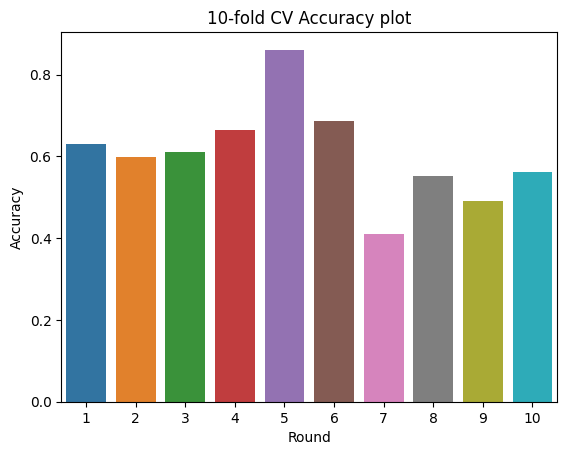

Score avg on 10-fold CV: 0.6070597193516807



In [ ]:
model = RandomForestClassifier(n_estimators=20,random_state=random_state)
model_name = type(model).__name__
k = 10

print(model_name,"\n")
print(f"{k}-FOLD CV\n")
# k fold cross validation

cv_scores = cross_val_score(model, trips.drop(columns=["Modo", "Group"]), np.array(trips["Modo"]), cv=k, groups = np.array(trips["Group"]), n_jobs=-1)

# Scores on k-fold CV
# Imprimir el score de cada ronda
for i,score in zip(range(1,k+1),cv_scores):
    print(f"Round {i} score: {score}")
print("")

ax = sns.barplot(x = np.arange(1,11), y = np.array(cv_scores))
ax.set(xlabel='Round', ylabel='Accuracy',title=f"{k}-fold CV Accuracy plot")
plt.show()

# scores avg on k-fold CV
print(f"Score avg on {k}-fold CV: {cv_scores.mean()}\n")

#pickle
with open(os.path.join("models",f'{model_name}.pkl'), 'wb') as file:
    pkl.dump(model, file)

# Train-test with GroupkFold

Accuracy:  0.7279547678590845 

Classification Report

              precision    recall  f1-score   support

       Coche       0.68      0.85      0.76      4555
          TP       0.80      0.61      0.69      4642

    accuracy                           0.73      9197
   macro avg       0.74      0.73      0.72      9197
weighted avg       0.74      0.73      0.72      9197
 

Confusion Matrix



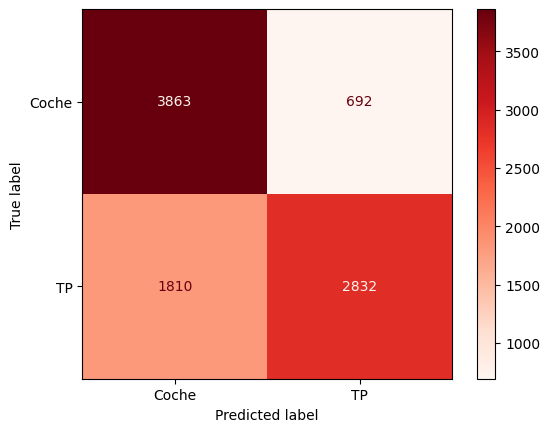

In [4]:
from sklearn.model_selection import GroupKFold

model = RandomForestClassifier(n_estimators=20,random_state=random_state)
model_name = type(model).__name__

X = trips.drop(columns=["Modo", "Group", "Mun_Ori", "Mun_Des", "Com_Ori", "Com_Des"])
# X = trips.drop(columns=["Modo", "Group"])
y = np.array(trips["Modo"])
groups = np.array(trips["Group"])

gkf = GroupKFold(n_splits=10)

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)


print("Accuracy: ",model.score(X_test,y_test),"\n")
# Prediction and Report
y_pred = model.predict(X_test)
print("Classification Report\n")
print(metrics.classification_report(y_test, y_pred),"\n")

print("Confusion Matrix\n")
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
# models[model_name] = model

#pickle
with open(os.path.join("/content/drive/MyDrive/Mobility_Choice/model/models",'rf.pkl'), 'wb') as file:
    pkl.dump(model, file)

Elapsed time to compute the importances: 0.016 seconds


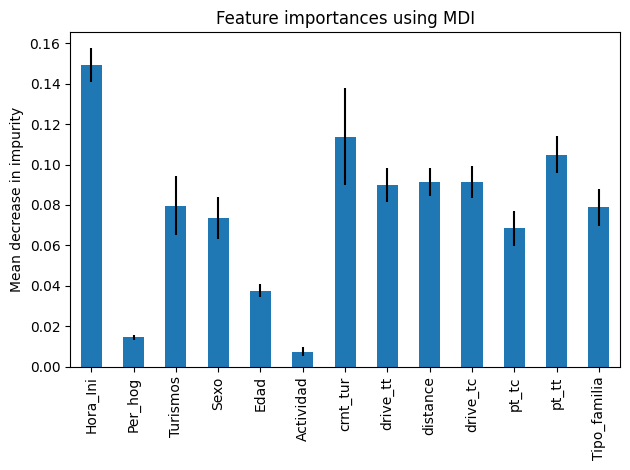

In [176]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
import pandas as pd
forest_importances = pd.Series(importances, index=trips.drop(columns=['Modo', 'Group', 'Mun_Ori', 'Mun_Des', 'Com_Ori', 'Com_Des']).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()